<a href="https://colab.research.google.com/github/Parinita-Jain/Course_Handouts_NLP_using_DL/blob/main/SpamClassification_glove_and_good_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [165]:
%%capture
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Text Pre-processing libraries
import nltk
import string
import warnings
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize

# Tensorflow imports to build the model.
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences



nltk.download("all")
nltk.download("punkt")
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')

warnings.filterwarnings('ignore')


In [166]:
df = pd.read_csv('spam.csv')
df.head()


,Category,Message
0,not spam,"Go until jurong point, crazy.. Available only ..."
1,not spam,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,not spam,U dun say so early hor... U c already then say...
4,not spam,"Nah I don't think he goes to usf, he lives aro..."


In [167]:
punc=string.punctuation
stop_words=set(stopwords.words("english"))
lemmatizer=WordNetLemmatizer()

In [168]:
def pre_process(text):
  a=[lemmatizer.lemmatize(i) for i in nltk.word_tokenize(text) if i not in stop_words]
  a=" ".join([i for i in a if i in punc])
  return a

In [169]:
df["M"]=df["Message"].str.lower()

In [170]:
df["M"]=df["M"].apply(pre_process)

In [171]:
df['t'] = df['Message'].str.lower()

# Removing punctuations present in the text
punctuations_list = string.punctuation
def remove_punctuations(text):
    temp = str.maketrans('', '', punctuations_list)
    return text.translate(temp)

df['t']= df['t'].apply(lambda x: remove_punctuations(x))
df.head()

,Category,Message,M,t
0,not spam,"Go until jurong point, crazy.. Available only ...",",",go until jurong point crazy available only in ...
1,not spam,Ok lar... Joking wif u oni...,,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,( ) &,free entry in 2 a wkly comp to win fa cup fina...
3,not spam,U dun say so early hor... U c already then say...,,u dun say so early hor u c already then say
4,not spam,"Nah I don't think he goes to usf, he lives aro...",",",nah i dont think he goes to usf he lives aroun...


In [172]:
def remove_stopwords(text):
	stop_words = stopwords.words('english')

	imp_words = []

	# Storing the important words
	for word in str(text).split():

		if word not in stop_words:

			# Let's Lemmatize the word as well
			# before appending to the imp_words list.

			lemmatizer = WordNetLemmatizer()
			lemmatizer.lemmatize(word)

			imp_words.append(word)

	output = " ".join(imp_words)

	return output


df['t'] = df['t'].apply(lambda text: remove_stopwords(text))



In [173]:
df["M"]

0               ,
1                
2           ( ) &
3                
4               ,
          ...    
5567    . , ! . .
5568            ?
5569      , * . ?
5570             
5571            .
Name: M, Length: 5572, dtype: object

In [174]:
df["t"]

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry 2 wkly comp win fa cup final tkts 2...
3                     u dun say early hor u c already say
4             nah dont think goes usf lives around though
                              ...                        
5567    2nd time tried 2 contact u u £750 pound prize ...
5568                          ü b going esplanade fr home
5569                          pity mood soany suggestions
5570    guy bitching acted like id interested buying s...
5571                                       rofl true name
Name: t, Length: 5572, dtype: object

In [175]:
from bs4 import BeautifulSoup
import re
def cleaner(text):

  # take off html tags
  text = BeautifulSoup(text).get_text()

  # fetch alphabetic characters
  text = re.sub("[^a-zA-Z]", " ", text)

  # convert text to lower case
  text = text.lower()

  # removing extra spaces
  text=re.sub("[\s]+"," ",text)

  # creating doc object

  tokens=[lemmatizer.lemmatize(i) for i in nltk.word_tokenize(text) if (i not in stop_words)]


  return " ".join(tokens)

In [176]:
df["C"]=df["Message"].str.lower()
df['cleaned_text'] = df['C'].apply(cleaner)

In [177]:
df["M"][0]

','

In [178]:
df["t"][0]

'go jurong point crazy available bugis n great world la e buffet cine got amore wat'

In [179]:
df['cleaned_text'][0]

'go jurong point crazy available bugis n great world la e buffet cine got amore wat'

In [180]:
df["Message"][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

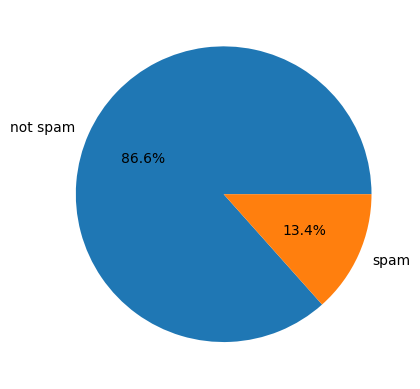

In [181]:

plt.pie(df['Category'].value_counts().values,
        labels=df['Category'].value_counts().index,
        autopct='%1.1f%%')
plt.show()

In [182]:
df['Category'].value_counts()

not spam    4825
spam         747
Name: Category, dtype: int64

In [183]:
class_2 = df[df['Category'] == "not spam"].sample(n=3500)
class_1 = df[df['Category'] == "spam"]

In [184]:
balanced_df = pd.concat([class_1, class_1, class_1, class_1,class_1, class_2], axis=0)

In [185]:
balanced_df.columns

Index(['Category', 'Message', 'M', 't', 'C', 'cleaned_text'], dtype='object')

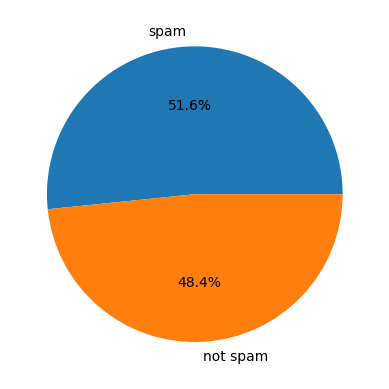

In [186]:

plt.pie(balanced_df['Category'].value_counts().values,
        labels=balanced_df['Category'].value_counts().index,
        autopct='%1.1f%%')
plt.show()

In [187]:
balanced_df

,Category,Message,M,t,C,cleaned_text
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,( ) &,free entry 2 wkly comp win fa cup final tkts 2...,free entry in 2 a wkly comp to win fa cup fina...,free entry wkly comp win fa cup final tkts st ...
5,spam,FreeMsg Hey there darling it's been 3 week's n...,"! ? ! ,",freemsg hey darling 3 weeks word back id like ...,freemsg hey there darling it's been 3 week's n...,freemsg hey darling week word back like fun st...
8,spam,WINNER!! As a valued network customer you have...,! ! ! . .,winner valued network customer selected receiv...,winner!! as a valued network customer you have...,winner valued network customer selected receiv...
9,spam,Had your mobile 11 months or more? U R entitle...,? !,mobile 11 months u r entitled update latest co...,had your mobile 11 months or more? u r entitle...,mobile month u r entitled update latest colour...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...","! > , ,",six chances win cash 100 20000 pounds txt csh1...,"six chances to win cash! from 100 to 20,000 po...",six chance win cash pound txt csh send cost p ...
...,...,...,...,...,...,...
1162,not spam,K. I will sent it again,,k sent,k. i will sent it again,k sent
3997,not spam,We'll you pay over like &lt;#&gt; yrs so its ...,& ; # & ;,well pay like ltgt yrs difficult,we'll you pay over like &lt;#&gt; yrs so its ...,pay like yr difficult
1581,not spam,"I shall book chez jules for half eight, if tha...",", ?",shall book chez jules half eight thats ok,"i shall book chez jules for half eight, if tha...",shall book chez jules half eight ok
97,not spam,i see. When we finish we have loads of loans t...,.,see finish loads loans pay,i see. when we finish we have loads of loans t...,see finish load loan pay


In [188]:

# feature and target
# train test split

X = balanced_df["cleaned_text"]
y = balanced_df["Category"]

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [189]:
tok = Tokenizer()
tok.fit_on_texts(X_train)

In [190]:

vocabulary = tok.word_index

print(vocabulary)

vocab_length = len(vocabulary)

print(vocab_length)

{'call': 1, 'u': 2, 'free': 3, 'p': 4, 'ur': 5, 'txt': 6, 'text': 7, 'mobile': 8, 'stop': 9, 'get': 10, 'c': 11, 'reply': 12, 'claim': 13, 'www': 14, 'min': 15, 'tone': 16, 'prize': 17, 'send': 18, 'new': 19, 'week': 20, 'uk': 21, 'day': 22, 'go': 23, 'msg': 24, 'win': 25, 'nokia': 26, 'cash': 27, 'service': 28, 'phone': 29, 'please': 30, 'know': 31, 'co': 32, 'want': 33, 'urgent': 34, 'box': 35, 'com': 36, 'today': 37, 'message': 38, 'r': 39, 'contact': 40, 'n': 41, 'time': 42, 'customer': 43, 'guaranteed': 44, 'w': 45, 'ok': 46, 'number': 47, 'per': 48, 'good': 49, 'chat': 50, 'got': 51, 'like': 52, 'ppm': 53, 'every': 54, 'find': 55, 'show': 56, 'back': 57, 'take': 58, 'love': 59, 'come': 60, 'draw': 61, 'pobox': 62, 'see': 63, 'latest': 64, 'hi': 65, 'offer': 66, 'awarded': 67, 'rate': 68, 'tell': 69, 'voucher': 70, 'sm': 71, 'line': 72, 'camera': 73, 'k': 74, 'b': 75, 'cost': 76, 'wk': 77, 'video': 78, 'need': 79, 'pm': 80, 'yes': 81, 'st': 82, 'one': 83, 'help': 84, 'landline': 8

In [191]:
train_sequences = tok.texts_to_sequences(X_train)
print(train_sequences)

[[33, 976, 5, 610, 132, 19, 16, 12, 16, 2, 7, 14, 323, 32, 21, 611, 41, 216, 16, 202, 100, 215, 68, 98], [149, 42, 200, 40, 2, 2, 133, 17, 13, 217, 1, 4, 48, 15, 165, 142, 68], [1455, 1706, 290], [570, 26, 16, 2, 470, 16, 439, 300, 16, 1060, 439, 1061, 1062, 1063, 1064, 1065, 14, 312, 32, 21, 62, 45, 224, 4], [725], [175, 3058, 2110, 517, 58, 107, 83, 2110, 125, 2111, 117, 328, 113, 2112, 612], [200, 40, 66, 19, 78, 29, 254, 100, 15, 186, 166, 273, 213, 1, 12, 144, 1335], [71, 301, 1066, 19, 1707, 1708, 1456, 689, 1709, 150, 977, 1710, 571, 1711, 125, 12, 125, 1066], [1181, 2, 1182, 237, 336, 2476, 810, 336], [170, 130, 187, 56, 613, 153, 158, 13, 1, 182, 88, 171], [3059, 183, 217, 137, 130, 3060, 145, 2113], [572, 8, 176, 369, 138, 64, 134, 73, 8, 3, 1, 8, 138, 32, 3], [43, 28, 490, 1183, 200, 104, 144, 978, 30, 1, 1336, 726], [225, 13, 5, 71, 38, 7, 46, 226, 979, 8, 5, 203, 428, 172, 6, 36, 4, 77, 11, 35, 768, 861, 589, 2114, 9], [105, 429, 50], [24, 8, 218, 242, 1712, 1457, 173, 145

In [192]:
doc_length = []

for doc in train_sequences:
  doc_length.append(len(doc))

print(doc_length)

[24, 17, 3, 24, 1, 15, 17, 18, 8, 12, 8, 15, 12, 25, 3, 16, 16, 18, 17, 2, 12, 15, 11, 12, 19, 21, 17, 16, 1, 20, 1, 10, 15, 16, 19, 16, 9, 19, 13, 62, 17, 1, 22, 14, 20, 18, 6, 19, 18, 13, 9, 8, 17, 11, 20, 13, 17, 14, 19, 14, 20, 12, 5, 14, 16, 20, 6, 18, 15, 5, 4, 3, 5, 10, 7, 21, 19, 4, 4, 17, 3, 3, 3, 5, 6, 22, 9, 16, 15, 19, 21, 17, 13, 21, 11, 2, 2, 12, 8, 13, 13, 4, 12, 3, 6, 7, 6, 18, 3, 7, 13, 5, 21, 18, 24, 20, 12, 9, 22, 14, 6, 8, 18, 10, 18, 8, 7, 7, 14, 11, 4, 5, 4, 15, 13, 13, 7, 15, 15, 1, 5, 4, 11, 23, 18, 19, 3, 6, 8, 15, 2, 15, 7, 3, 18, 11, 6, 20, 7, 15, 3, 8, 7, 3, 9, 3, 7, 14, 21, 2, 2, 19, 17, 5, 3, 0, 8, 12, 7, 11, 24, 16, 19, 4, 8, 19, 1, 1, 3, 26, 14, 16, 4, 17, 3, 3, 5, 19, 19, 4, 3, 24, 11, 14, 17, 10, 11, 9, 6, 11, 5, 3, 9, 2, 4, 10, 4, 7, 14, 7, 12, 17, 4, 12, 4, 9, 19, 6, 13, 16, 19, 15, 2, 3, 12, 15, 21, 13, 2, 13, 21, 13, 18, 23, 14, 16, 6, 13, 12, 15, 3, 23, 9, 10, 7, 23, 6, 10, 17, 11, 15, 18, 6, 8, 15, 13, 14, 7, 2, 5, 16, 19, 7, 9, 5, 13, 13, 16, 23

In [193]:

print("max length - ", max(doc_length))
print("99% qunatile - ", np.quantile(doc_length,0.99))
print("95% quantile- ", np.quantile(doc_length,0.95))
print("90% quantile- ", np.quantile(doc_length,0.90))

max length -  73
99% qunatile -  26.0
95% quantile-  22.0
90% quantile-  20.0


In [194]:
max_length = 26

In [195]:
train_matrix = sequence.pad_sequences(train_sequences,maxlen=max_length)
print(train_matrix )


[[   0    0   33 ...  215   68   98]
 [   0    0    0 ...  165  142   68]
 [   0    0    0 ... 1455 1706  290]
 ...
 [   0    0    0 ...  551    1  456]
 [   0    0    0 ...   53 2156  376]
 [   0    0    0 ...   83  126 5334]]


In [196]:

test_sequences = tok.texts_to_sequences(X_test)
test_matrix = sequence.pad_sequences(test_sequences,maxlen=max_length)
print(test_matrix)

[[   0    0    0 ...   35  815   45]
 [   0    0    0 ...   36  414 2439]
 [   0    0    0 ...   11  398  444]
 ...
 [   0    0    0 ...   80  376   15]
 [   0    0    0 ...   41 1080    4]
 [   0    0    0 ...  228  532 1314]]


In [197]:
model = Sequential()
model.add(Embedding(input_dim=vocab_length+1,
                    output_dim=32,
                    input_length=max_length,
                    mask_zero=True))
model.add(Flatten())
model.add(Dense(64, activation="tanh"))
model.add(Dense(32, activation="tanh"))
model.add(Dense(16, activation="tanh"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy")

print(model.summary)

keras.utils.plot_model(
    model,
    show_shapes=True,
    show_dtype=True,
    show_layer_activations=True
)

model.fit(train_matrix, y_train, epochs=10, batch_size=32)


<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7efab353d600>>
Epoch 1/10
159/159 [==============================] - 18s 104ms/step - loss: 0.1904
Epoch 2/10
159/159 [==============================] - 4s 26ms/step - loss: 0.0148
Epoch 3/10
159/159 [==============================] - 3s 17ms/step - loss: 0.0029
Epoch 4/10
159/159 [==============================] - 2s 11ms/step - loss: 0.0012
Epoch 5/10
159/159 [==============================] - 1s 8ms/step - loss: 8.1642e-04
Epoch 6/10
159/159 [==============================] - 2s 12ms/step - loss: 5.9894e-04
Epoch 7/10
159/159 [==============================] - 2s 12ms/step - loss: 4.6069e-04
Epoch 8/10
159/159 [==============================] - 3s 17ms/step - loss: 3.6617e-04
Epoch 9/10
159/159 [==============================] - 1s 9ms/step - loss: 2.9813e-04
Epoch 10/10
159/159 [==============================] - 1s 4ms/step - loss: 2.4732e-04


In [198]:
y_pred = model.predict(test_matrix)
y_pred = np.where(y_pred >= 0.5, 1, 0)
print(classification_report(y_test,y_pred))

68/68 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1073
           1       1.00      1.00      1.00      1098

    accuracy                           1.00      2171
   macro avg       1.00      1.00      1.00      2171
weighted avg       1.00      1.00      1.00      2171



In [199]:


embeddings_index={}
f=open("/content/glove.6B.100d.txt",encoding="utf-8")
for line in f:
  values=line.split()
  word=values[0]
  coefs=np.asarray(values[1:],dtype="float32")
  embeddings_index[word]=coefs
f.close()


In [200]:

embedding_dim=100
embedding_matrix=np.zeros((vocab_length+1,embedding_dim))
for word,i in tok.word_index.items():
  embedding_vector=embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i]=embedding_vector

In [201]:
model=Sequential()
model.add(Embedding(vocab_length+1,
                    embedding_dim,
                    weights=[embedding_matrix],
                    input_length=max_length,
                    trainable=False))

model.add(Flatten())
model.add(Dense(64, activation="tanh"))
model.add(Dense(32, activation="tanh"))
model.add(Dense(16, activation="tanh"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy")

model.fit(train_matrix, y_train, epochs=10, batch_size=32)

Epoch 1/10
159/159 [==============================] - 2s 3ms/step - loss: 0.1781
Epoch 2/10
159/159 [==============================] - 1s 3ms/step - loss: 0.0533
Epoch 3/10
159/159 [==============================] - 1s 3ms/step - loss: 0.0305
Epoch 4/10
159/159 [==============================] - 1s 3ms/step - loss: 0.0240
Epoch 5/10
159/159 [==============================] - 1s 4ms/step - loss: 0.0179
Epoch 6/10
159/159 [==============================] - 1s 4ms/step - loss: 0.0128
Epoch 7/10
159/159 [==============================] - 1s 4ms/step - loss: 0.0102
Epoch 8/10
159/159 [==============================] - 1s 3ms/step - loss: 0.0089
Epoch 9/10
159/159 [==============================] - 1s 4ms/step - loss: 0.0083
Epoch 10/10
159/159 [==============================] - 1s 3ms/step - loss: 0.0075


In [202]:
y_pred = model.predict(test_matrix)
y_pred = np.where(y_pred >= 0.5, 1, 0)
print(classification_report(y_test,y_pred))

68/68 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1073
           1       0.98      1.00      0.99      1098

    accuracy                           0.99      2171
   macro avg       0.99      0.99      0.99      2171
weighted avg       0.99      0.99      0.99      2171

